In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##1. Load the dataset in Python environment  

In [ ]:
loan=pd.read_csv('/content/train_loan.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


##2. Perform different preprocessing steps
a. Missing value handling
b. Outlier detection
c. Encoding
d. Scaling

In [ ]:
# Count the  Missing
loan.isnull().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
#Display Columns
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#column Information
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Loan_id drop out from the dataset. it is not used in further operation
loan=loan.drop('Loan_ID',axis=1)


In [ ]:
# Display the Information after removing Loan_ID
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


#a. Missing Value Handling

In [ ]:
#Filling the missing values using mode imputation because the columns are object/Categorical
cols=['Gender','Married','Dependents','Self_Employed']
for c in cols:
  mode_value=loan[c].mode()[0]
  loan[c].fillna(mode_value,inplace=True)

<ipython-input-72-70345a0e519e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan[c].fillna(mode_value,inplace=True)


In [ ]:
#Filling the missing values using median imputation because the columns are Numerical
cols=['LoanAmount','Loan_Amount_Term','Credit_History']
for c in cols:
  median_value=loan[c].median()
  loan[c].fillna(median_value,inplace=True)

<ipython-input-73-c2fa879c1e04>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan[c].fillna(median_value,inplace=True)


In [ ]:
#Count the missing values after handling
loan.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


##b.Outlier Detection

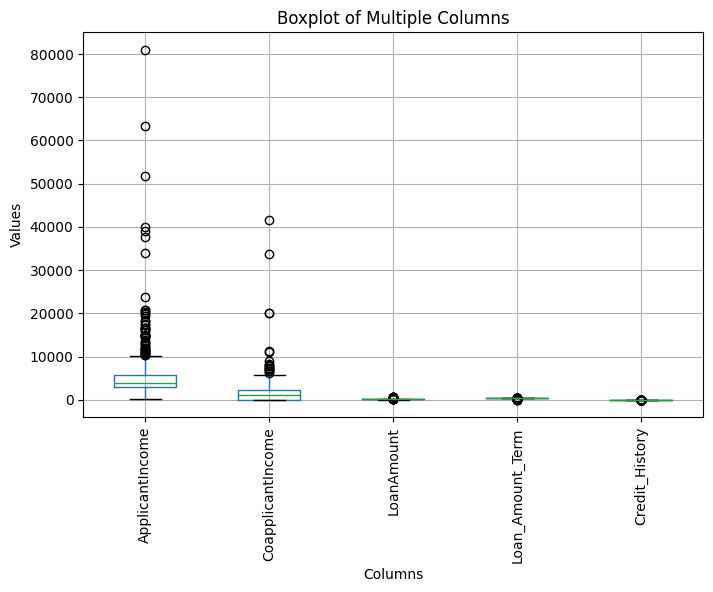

In [ ]:
#list the columns for box plot
# List of columns to include in the boxplot
box_plot_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
#columns_to_plot = maint_data.select_dtypes(include=['float64', 'int64']).columns
# Create boxplot
plt.figure(figsize=(8,5))
loan[box_plot_columns].boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()


Text(0.5, 1.0, 'Boxplot of ApplicantIncome')

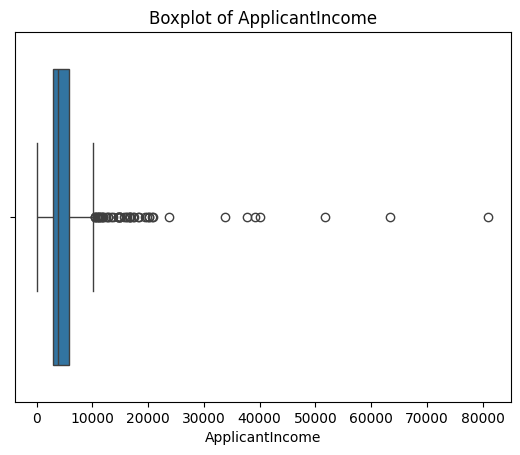

In [ ]:
#   Boxplot of  ApplicantIncome before outlier treatment.
sns.boxplot(x=loan['ApplicantIncome'],data=loan)
plt.title('Boxplot of ApplicantIncome')

Text(0.5, 1.0, 'Boxplot of CoapplicantIncome')

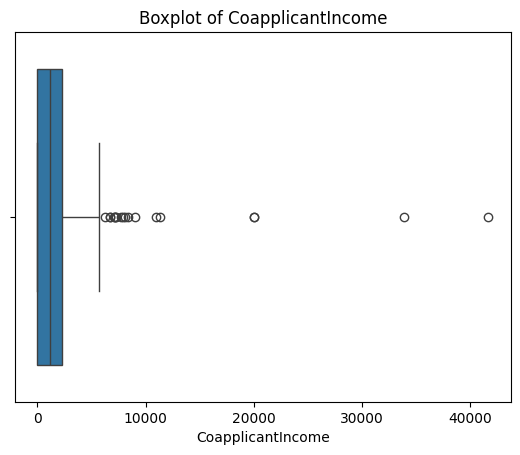

In [ ]:
#   Boxplot of  CoapplicantIncome before outlier treatment.
sns.boxplot(x=loan['CoapplicantIncome'],data=loan)
plt.title('Boxplot of CoapplicantIncome')

Text(0.5, 1.0, 'Boxplot of Loan Amount')

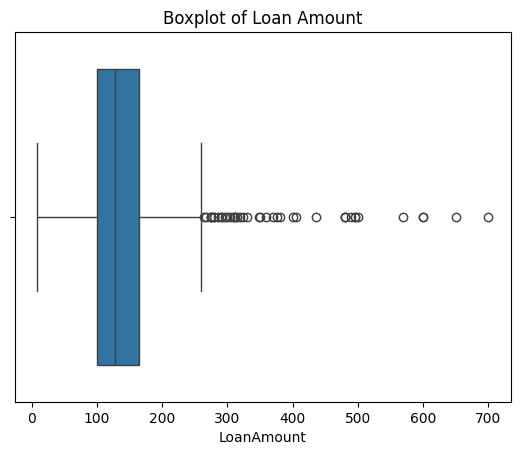

In [ ]:
#   Boxplot of  LoanAmount before outlier treatment.
sns.boxplot(x=loan['LoanAmount'],data=loan)
plt.title('Boxplot of Loan Amount')

Text(0.5, 1.0, 'Boxplot of Loan_Amount_Term')

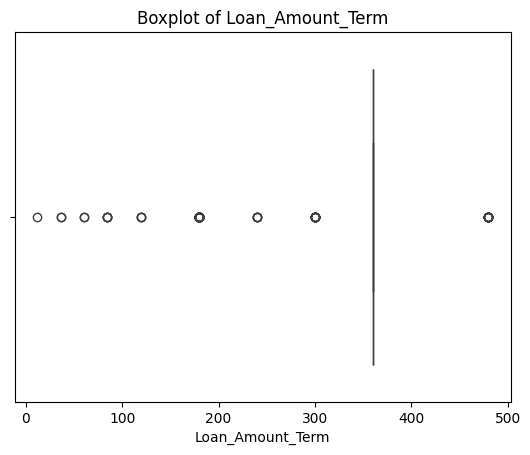

In [ ]:
#   Boxplot of  Loan_Amount_Term before outlier treatment.
sns.boxplot(x=loan['Loan_Amount_Term'],data=loan)
plt.title('Boxplot of Loan_Amount_Term')

Text(0.5, 1.0, 'Boxplot of Credit_History')

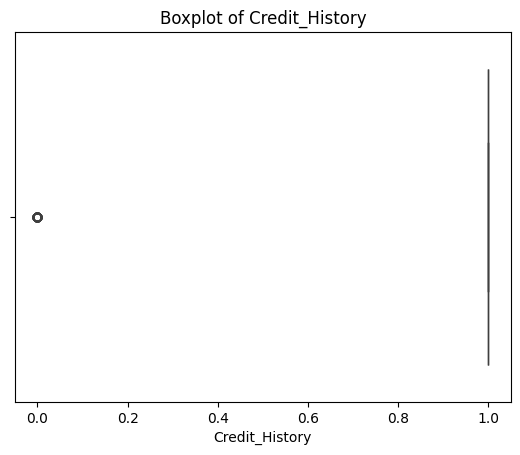

In [ ]:
#   Boxplot of  Credit_History before outlier treatment.
sns.boxplot(x=loan['Credit_History'],data=loan)
plt.title('Boxplot of Credit_History')

In [ ]:
# Columns to apply the IQR method
numeric_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

# Applying the IQR method to each specified column
for col in numeric_col:
    Q1 = loan[col].quantile(0.25)
    Q3 = loan[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    loan[col] = np.where(loan[col] < lower_bound, lower_bound, loan[col])
    loan[col] = np.where(loan[col] > upper_bound, upper_bound, loan[col])


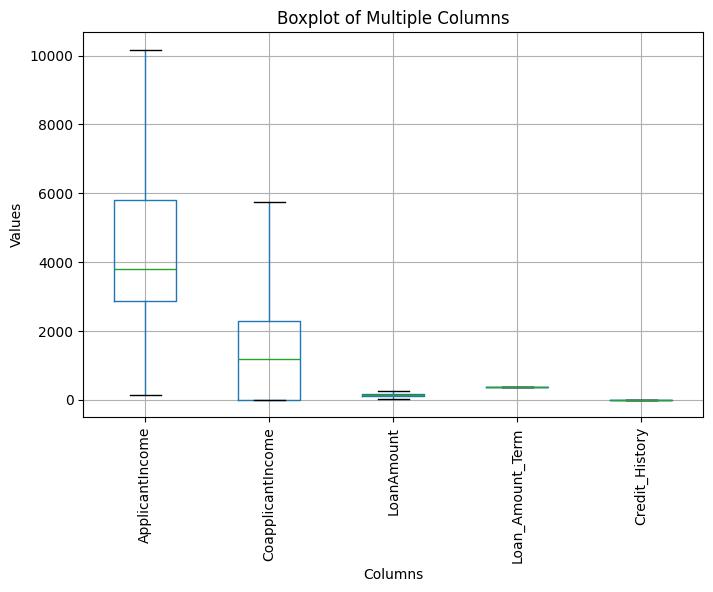

In [ ]:
#list the columns for box plot
# List of columns to include in the boxplot
box_plot_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
#columns_to_plot = maint_data.select_dtypes(include=['float64', 'int64']).columns
# Create boxplot
plt.figure(figsize=(8,5))
loan[box_plot_columns].boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

##c.Encoding

In [ ]:

#First Target encoding(Here target column is 'Loan_Status')
#Assuming values are like 'Y' and 'N', you can simply map them to 1 and 0:e
loan['Loan_Status'] = loan['Loan_Status'].map({'Y': 1, 'N': 0})

In [ ]:

#Next do Categorical Feature Encoding.
#First list out categorical columns in the dataset
categorical_col = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']

In [ ]:

#Next encode Binary Categorical Features Using Label Encoding.
#Here take the columns with  only two categories (like 'Male/Female', 'Yes/No', etc.).
#import Label Encoding
from sklearn.preprocessing import LabelEncoder
# Define binary columns
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed']
# Initialize LabelEncoder
label_encoders = {}
# Apply Label Encoding to binary columns
for col in binary_cols:
    le = LabelEncoder()
    loan[col] = le.fit_transform(loan[col])
    label_encoders[col] = le

loan.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,Urban,1


In [ ]:

#Next encode Multiclass Categorical Features Using One-Hot Encoding
#for this use the  columns with more than 2 categories(One-hot encode 'Dependents' and 'Property_Area')
loan = pd.get_dummies(loan, columns=['Dependents', 'Property_Area'], drop_first=True)
loan.head(5)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849.0,0.0,128.0,360.0,1.0,1,False,False,False,False,True
1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,True,False,False,False,False
2,1,1,0,1,3000.0,0.0,66.0,360.0,1.0,1,False,False,False,False,True
3,1,1,1,0,2583.0,2358.0,120.0,360.0,1.0,1,False,False,False,False,True
4,1,0,0,0,6000.0,0.0,141.0,360.0,1.0,1,False,False,False,False,True


In [ ]:
loan.dtypes

,0
Gender,int64
Married,int64
Education,int64
Self_Employed,int64
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64
Loan_Status,int64


##d.Scaling

In [ ]:
#First Separate Features and Target
X = loan.drop('Loan_Status', axis=1)  # Features (everything except 'Loan_Status')
y = loan['Loan_Status']

##standardization(z-Score)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("\nDataFrame after Standardization (Z-score):")
print(X_scaled)


DataFrame after Standardization (Z-score):
       Gender   Married  Education  Self_Employed  ApplicantIncome  \
0    0.472343 -1.372089  -0.528362      -0.392601         0.497164   
1    0.472343  0.728816  -0.528362      -0.392601        -0.013767   
2    0.472343  0.728816  -0.528362       2.547117        -0.652632   
3    0.472343  0.728816   1.892641      -0.392601        -0.820924   
4    0.472343 -1.372089  -0.528362      -0.392601         0.558104   
..        ...       ...        ...            ...              ...   
609 -2.117107 -1.372089  -0.528362      -0.392601        -0.692990   
610  0.472343  0.728816  -0.528362      -0.392601        -0.206274   
611  0.472343  0.728816  -0.528362      -0.392601         1.394319   
612  0.472343  0.728816  -0.528362      -0.392601         1.196969   
613 -2.117107 -1.372089  -0.528362       2.547117        -0.013767   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0            -0.874587   -0.168041         

##MIn-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax= MinMaxScaler()
X_mm=minmax.fit_transform(X)
X_mm=pd.DataFrame(X_mm)
print("\nDataFrame after Min-Max Scaling:")
print(X_mm)


DataFrame after Min-Max Scaling:
      0    1    2    3         4         5         6    7    8    9    10  \
0    1.0  0.0  0.0  0.0  0.568692  0.000000  0.471287  0.0  0.0  0.0  0.0   
1    1.0  1.0  0.0  0.0  0.442360  0.262575  0.471287  0.0  0.0  1.0  0.0   
2    1.0  1.0  0.0  1.0  0.284396  0.000000  0.225743  0.0  0.0  0.0  0.0   
3    1.0  1.0  1.0  0.0  0.242784  0.410578  0.439604  0.0  0.0  0.0  0.0   
4    1.0  0.0  0.0  0.0  0.583760  0.000000  0.522772  0.0  0.0  0.0  0.0   
..   ...  ...  ...  ...       ...       ...       ...  ...  ...  ...  ...   
609  0.0  0.0  0.0  0.0  0.274417  0.000000  0.245545  0.0  0.0  0.0  0.0   
610  1.0  1.0  0.0  0.0  0.394761  0.000000  0.122772  0.0  0.0  0.0  0.0   
611  1.0  1.0  0.0  0.0  0.790520  0.041789  0.966337  0.0  0.0  1.0  0.0   
612  1.0  1.0  0.0  0.0  0.741724  0.000000  0.704950  0.0  0.0  0.0  1.0   
613  0.0  0.0  0.0  1.0  0.442360  0.000000  0.491089  0.0  0.0  0.0  0.0   

      11   12   13  
0    0.0  0.0  1.0  